<a href="https://colab.research.google.com/github/rromerov/Proyecto_Integrador/blob/main/Avance3/Avance3.12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Aplicación de Modelos de Machine Learning y Acoplamiento Molecular en el Diseño Acelerado de Fármacos, propuesta contra la Viruela del Simio (MPOX). Enfoque en la Proteína F13; con Datos Experimentales Limitados.**

### Avance 3: Baseline

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Carlos Alberto Brizuela Rodríguez  – Profesor Tutor

#### **Miembro del equipo:**
- Carlos Mario Larrahondo Valencia - A01794031



---


### Baseline

Como ya se ha identificado en las entregas anteriores, en resumen, el objetivo del proyecto es identificar a traves del uso de herramientas de Machine Learning, el conjunto de caracteristicas que permitan acelerar el proceso de identificación de moleculas y como estas interactuan con las enzimas o proteinas, permitiendo encontrar posibles actividades biologicas que permitan el tratamiento de alguna proteina en particular, como es el que se esta investigando que sería la inhibicion de la proteina F13. Esto con la informacion que reposa en la base de datos CHEMBL.

Para el proyecto se han tenido en cuenta el uso de fingerprints o huellas moleculares, las cuales se generan con la herramienta PaDel y se usa el modelo de Random Forest para predecir la actividad biológica de compuestos químicos, una linea base que es facil de interpretar; la cual permite predecir el valor numérico continuo, correspondiente a la afinidad de la union de un compuesto a una proteina, lo que se esta determinando a través de la variable denominada IC50.








---











---

### Código para el modelo

In [2]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from google.colab import drive
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import learning_curve
import numpy as np

In [3]:
# Cargar Google Drive al notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cargar el dataset
ruta_archivo_bioactivity = '/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_2class_pIC50_pubchem_fp.csv'

# Lee el archivo CSV en un DataFrame
df_bioactivity = pd.read_csv(ruta_archivo_bioactivity)

# Mostrar que se haya importado correctamente el archivo
df_bioactivity.head(5)


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.390983
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.267701
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.365195
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.600735
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.483040


#### Etiquetas y variable objetivo

The Neuropilin-1 data set contains 881 input features and 1 output variable (pIC50 values).


In [5]:
# Se define conjunto X para las etiquetas
X = df_bioactivity.drop('pIC50', axis=1)
# Mostrar contenido en el conjunto de X
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
208,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
209,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
210,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Se define variable Y para el objetivo
Y = df_bioactivity.pIC50
# Mostrar contenido en el conjunto de Y
Y

,pIC50
0,0.390983
1,0.267701
2,0.365195
3,0.600735
4,0.483040
...,...
207,0.917519
208,0.621666
209,0.275419
210,0.640614


#### Dimensión de los conjuntos



In [7]:
# Dimensiones de las variables predictoras
X.shape

(212, 881)

In [8]:
# Dimensiones de la variable predicha
Y.shape

(212,)

Eliminamos columnas con baja varianza


In [9]:
# Creamos un objeto VarianceThreshold con el umbral definido
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
# Transformamos la matriz de características X utilizando el objeto VarianceThreshold
X = selection.fit_transform(X)

In [10]:
# Dimensiones de las variables predictoras
X.shape

(212, 156)

#### Data split

(70/30 ratio)

In [11]:
# Dividimos los datos en dos conjuntos, los de entrenamiento y los de prueba, teniendo los últimos un 20% de las muestras
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
# Dimensiones del conjunto de entrenamiento
X_train.shape, Y_train.shape

((148, 156), (148,))

In [12]:
# Dimensiones del conjunto de prueba
X_test.shape, Y_test.shape

((64, 156), (64,))

#### Modelo de regresión con Random Forest



In [13]:
from sklearn.metrics import mean_squared_error
# Objeto RandomForestRegressor con el número de árboles definido
model = RandomForestRegressor(n_estimators=125)
# Entrenamiento del modelo
model.fit(X_train, Y_train)
# Cálculo del puntaje R^2 del modelo en los datos de prueba X_test e Y_test
r2_t = model.score(X_test, Y_test)
r2_tr = model.score(X_train, Y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_pred, Y_test)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R2_t-squared Score: {r2_t:.4f}")
print(f"R2_tr-squared Score: {r2_tr:.4f}")

Mean Squared Error: 0.0328
R2_t-squared Score: 0.4104
R2_tr-squared Score: 0.8461


In [14]:
# Predicciones sobre los datos de prueba X_test
Y_pred = model.predict(X_test)

In [15]:
# Predicciones en el conjunto de entrenamiento
Y_train_pred = model.predict(X_train)

### Gráficos de dispersión de los valores pIC50 expirementales contra los predichos

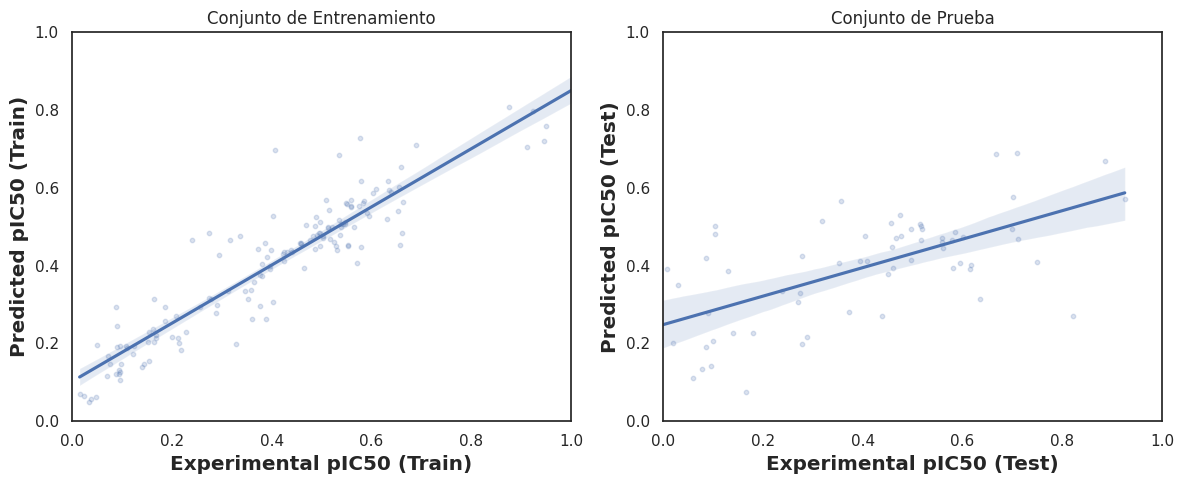

In [16]:
# Gráfico de predicciones del conjunto de entrenamiento
sns.set(color_codes=True)
sns.set_style("white")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Función para añadir jitter
def add_jitter(arr, noise=0.01):
    return arr + np.random.normal(0, noise, arr.shape)

# Gráfico para el conjunto de entrenamiento con jitter y menor opacidad
sns.regplot(x=add_jitter(Y_train), y=add_jitter(Y_train_pred), scatter_kws={'alpha':0.2, 's':10}, ax=ax[0])
ax[0].set_xlabel('Experimental pIC50 (Train)', fontsize='large', fontweight='bold')
ax[0].set_ylabel('Predicted pIC50 (Train)', fontsize='large', fontweight='bold')
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].set_title('Conjunto de Entrenamiento')

# Gráfico para el conjunto de prueba con jitter y menor opacidad
sns.regplot(x=add_jitter(Y_test), y=add_jitter(Y_pred), scatter_kws={'alpha':0.2, 's':10}, ax=ax[1])
ax[1].set_xlabel('Experimental pIC50 (Test)', fontsize='large', fontweight='bold')
ax[1].set_ylabel('Predicted pIC50 (Test)', fontsize='large', fontweight='bold')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
ax[1].set_title('Conjunto de Prueba')

plt.tight_layout()
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 100}
Mean Squared Error (Train): 0.0141
Mean Squared Error (Test): 0.0343
R^2 Score (Train): 0.6932
R^2 Score (Test): 0.3829


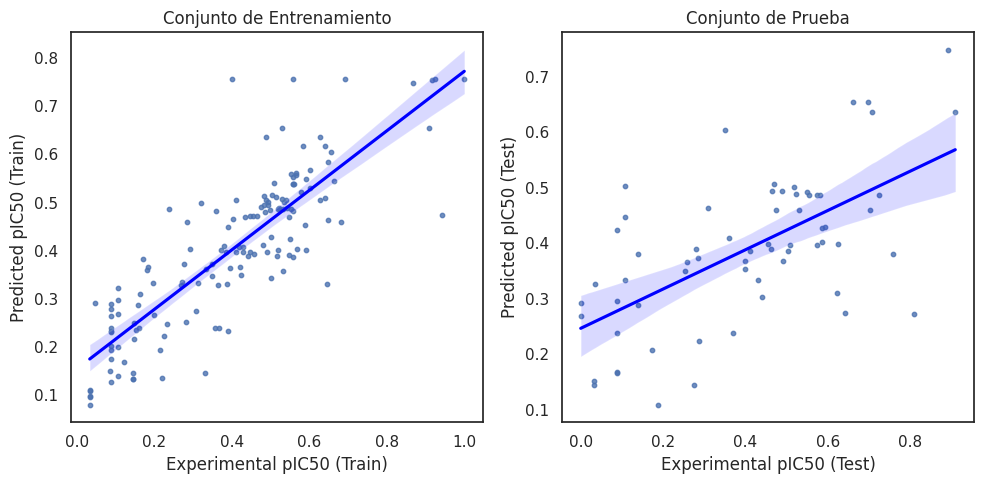

In [17]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Definir el modelo base de Random Forest
rf_model = RandomForestRegressor()

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

# Definir la validación cruzada con 5 particiones (5-fold CV)
cv = KFold(n_splits=5, shuffle=True)

# Realizar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Entrenar el modelo con los mejores hiperparámetros
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, Y_train)

# Evaluar el modelo optimizado
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

# Métricas de evaluación
mse_train = mean_squared_error(Y_train, y_pred_train)
mse_test = mean_squared_error(Y_test, y_pred_test)
r2_train = r2_score(Y_train, y_pred_train)
r2_test = r2_score(Y_test, y_pred_test)

print(f"Mean Squared Error (Train): {mse_train:.4f}")
print(f"Mean Squared Error (Test): {mse_test:.4f}")
print(f"R^2 Score (Train): {r2_train:.4f}")
print(f"R^2 Score (Test): {r2_test:.4f}")

# Gráficas de resultados
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de predicciones vs datos experimentales en el conjunto de entrenamiento
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.regplot(x=Y_train, y=y_pred_train, scatter_kws={"s": 10}, line_kws={"color": "blue"})
plt.xlabel('Experimental pIC50 (Train)')
plt.ylabel('Predicted pIC50 (Train)')
plt.title('Conjunto de Entrenamiento')

# Gráfico de predicciones vs datos experimentales en el conjunto de prueba
plt.subplot(1, 2, 2)
sns.regplot(x=Y_test, y=y_pred_test, scatter_kws={"s": 10}, line_kws={"color": "blue"})
plt.xlabel('Experimental pIC50 (Test)')
plt.ylabel('Predicted pIC50 (Test)')
plt.title('Conjunto de Prueba')

plt.tight_layout()
plt.show()


In [18]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


Mean Squared Error (Train): 0.0064
Mean Squared Error (Test): 0.0258
R^2 Score (Train): 0.8687
R^2 Score (Test): 0.4557


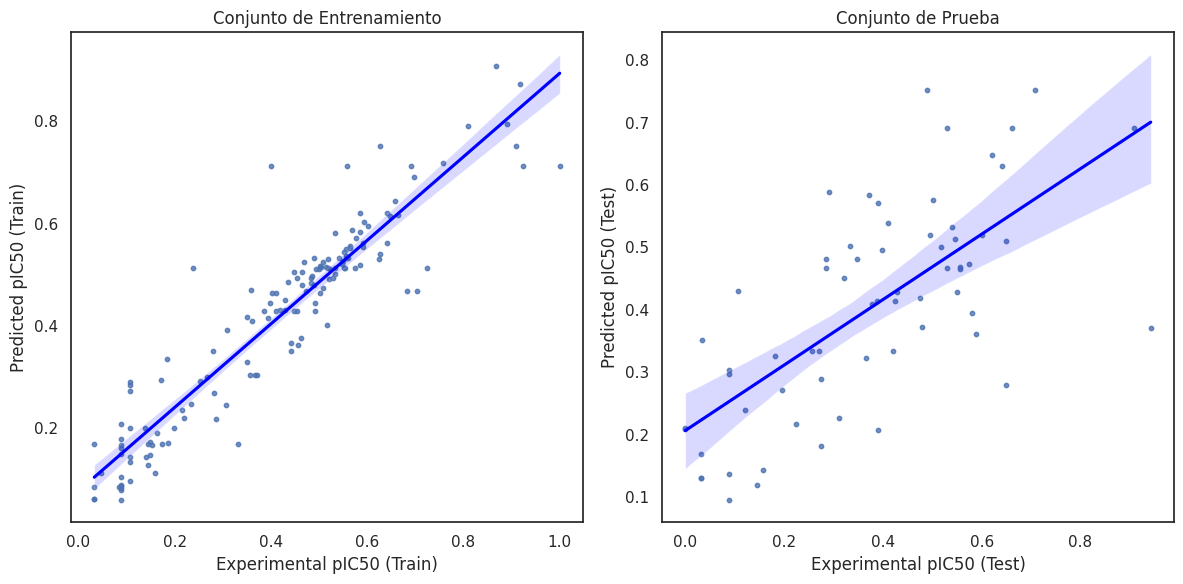

In [19]:
# Importación de las bibliotecas necesarias
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Definir el modelo XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror',
                         n_estimators=100,  # Número de árboles
                         max_depth=3,  # Profundidad máxima de los árboles
                         learning_rate=0.1,  # Tasa de aprendizaje
                         subsample=0.8,  # Fracción de muestras usadas por árbol
                         colsample_bytree=0.8)  # Fracción de características usadas por árbol

# Ajustar el modelo a los datos de entrenamiento
xgb_model.fit(X_train, Y_train)

# Predecir en los datos de prueba
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calcular métricas de evaluación
mse_train = mean_squared_error(Y_train, y_train_pred)
mse_test = mean_squared_error(Y_test, y_test_pred)
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)

# Mostrar resultados
print(f"Mean Squared Error (Train): {mse_train:.4f}")
print(f"Mean Squared Error (Test): {mse_test:.4f}")
print(f"R^2 Score (Train): {r2_train:.4f}")
print(f"R^2 Score (Test): {r2_test:.4f}")

# Graficar resultados para ver las predicciones frente a los valores reales
plt.figure(figsize=(12, 6))

# Gráfico para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
sns.regplot(x=Y_train, y=y_train_pred, scatter_kws={"s": 10}, line_kws={"color": "blue"})
plt.xlabel("Experimental pIC50 (Train)")
plt.ylabel("Predicted pIC50 (Train)")
plt.title("Conjunto de Entrenamiento")

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
sns.regplot(x=Y_test, y=y_test_pred, scatter_kws={"s": 10}, line_kws={"color": "blue"})
plt.xlabel("Experimental pIC50 (Test)")
plt.ylabel("Predicted pIC50 (Test)")
plt.title("Conjunto de Prueba")

plt.tight_layout()
plt.show()


### **Conclusiones**

El hacer uso de los fingerprints generados con la herramienta PaDel, lo que se pretende es identificar la afinidad de unión de un compuesto a una proteína, generando un conjunto de uno y cero.

### **Análisis del Modelo**

Se ha seleccionado el modelo Randon Forest, debido a que maneja una alta dimensionalidad, la cual puede ser entregada por el uso del fingerprinter.

En las graficas se observa las predicciones que han presentado los modelos. Pero antes se observan los valores de las metricas de evaluación. En donde se identifica que el modelo aparentemente esta sobre ajustado, pero se debe de tener en cuenta que los valores experimentales en los modelos ha capturado una cierta region, es decir no captura una cantidad exacta de información, entonces no se puede tener la certeza que esta sobre ajustado.

## Referencias
